# Experiment No: 5 (Part A)
**Aim:** To build and evaluate a Logistic Regression model on the Spambase dataset to classify emails as spam or non-spam.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load Data
spambase = fetch_ucirepo(id=94)
X = spambase.data.features
y = spambase.data.targets

# Flatten y to a 1D array (needed for sklearn)
y = y.values.ravel()

print(f"Data Loaded: X shape={X.shape}, y shape={y.shape}")

Data Loaded: X shape=(4601, 57), y shape=(4601,)


In [2]:
# 2. Preprocessing
# Logistic Regression is sensitive to scale, so we standarize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Data successfully split and scaled.")

Data successfully split and scaled.


--- Model Performance (Spambase) ---
Accuracy: 0.9197

Confusion Matrix:


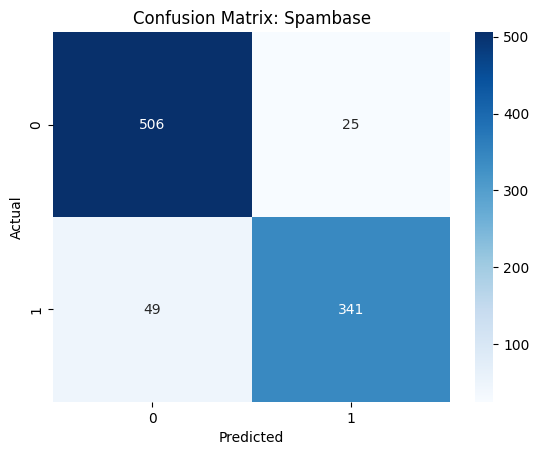


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       531
           1       0.93      0.87      0.90       390

    accuracy                           0.92       921
   macro avg       0.92      0.91      0.92       921
weighted avg       0.92      0.92      0.92       921



In [3]:
# 4. Model Training
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# 5. Evaluation
y_pred = log_reg.predict(X_test)

print("--- Model Performance (Spambase) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")

print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Spambase')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Experiment No: 5 (Part B)
**Aim:** To perform data cleaning, feature encoding, and scaling on the Housing dataset, and to build a Logistic Regression model to predict if a house is "High Price" or "Low Price".

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load Data (Using the uploaded file)
df = pd.read_csv('./data/housing_train.csv')

# 2. Feature Engineering (Regression -> Classification)
# Create a binary target: 1 if Price is above median, 0 otherwise
median_price = df['SalePrice'].median()
df['HighPrice'] = (df['SalePrice'] > median_price).astype(int)

print(f"Median Price: ${median_price}")
print("Target 'HighPrice' distribution:")
print(df['HighPrice'].value_counts())

Median Price: $163000.0
Target 'HighPrice' distribution:
HighPrice
0    732
1    728
Name: count, dtype: int64


In [5]:
# 3. Select Features
# We pick a mix of numeric and categorical features for the lab
numeric_cols = ['LotArea', 'YearBuilt', 'FullBath', 'TotRmsAbvGrd']
categorical_cols = ['BldgType', 'HouseStyle']

# Combine selected features
X = df[numeric_cols + categorical_cols]
y = df['HighPrice']

# 4. Cleaning (Handling Nulls)
# Fill numeric with median, categorical with mode (if any)
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].median())
for col in categorical_cols:
    X[col] = X[col].fillna(X[col].mode()[0])

# 5. Encoding Categorical Features (One-Hot Encoding)
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# 6. Scaling Numeric Features
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

print("Data processed. Features shape:", X.shape)
print("Features used:", list(X.columns))

Data processed. Features shape: (1460, 15)
Features used: ['LotArea', 'YearBuilt', 'FullBath', 'TotRmsAbvGrd', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl']


--- Model Performance (Housing Data) ---
Accuracy: 0.8938

Confusion Matrix:


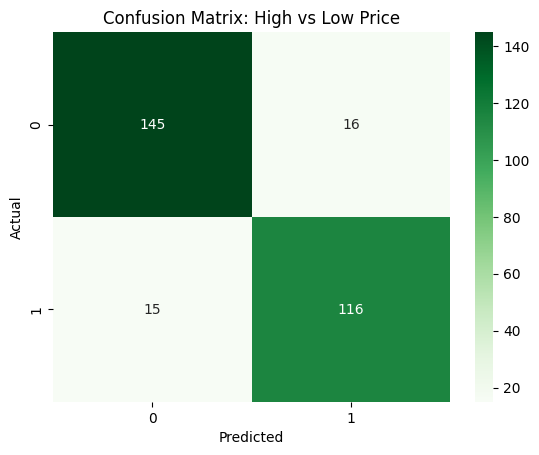


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       161
           1       0.88      0.89      0.88       131

    accuracy                           0.89       292
   macro avg       0.89      0.89      0.89       292
weighted avg       0.89      0.89      0.89       292



In [6]:
# 7. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

# 9. Evaluation
y_pred = model.predict(X_test)

print("--- Model Performance (Housing Data) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")

print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix: High vs Low Price')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))